<a href="https://colab.research.google.com/github/dkuzzmin/DI-Bootcamp/blob/main/Week9/Day3/W9D3DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error


# Data Preparation And Exploration (30 Min)

In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
test = pd.read_csv('DailyDelhiClimateTest.csv')

df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


ChatGTP:

### Interpolation Methods:

1. **Linear Interpolation**: Fills missing values by drawing a straight line between two known values. It's suitable for data with uniform changes.

2. **Spline Interpolation**: Uses low-degree polynomials for interpolating data within subintervals of the time series. It's better for more complex data where changes aren't always linear.

3. **Nearest Neighbor Interpolation**: Replaces a missing value with the value of the nearest time point. Simple but may not be ideal for data with rapid changes.

4. **Polynomial Interpolation**: Utilizes high-degree polynomials to approximate data. Can lead to oscillations, especially at the data range ends.

5. **Least Squares Interpolation**: Minimizes the sum of squared differences between observed and interpolated values. Suitable for noisy data.

### Outlier Detection and Treatment:

1. **Statistical Methods**: Use statistical measures like Z-score or IQR (Interquartile Range) to identify outliers. Values beyond set thresholds may be considered outliers.

2. **Visualization**: Time series plots, box plots, and histograms can help visually identify outliers.

3. **Domain Expertise**: Consulting with climatology experts is crucial to understand whether outliers could be the result of real events, like extreme weather conditions.

4. **Filtering**: Applying filters, such as moving averages, can help smooth out time series and reduce the impact of outliers.

5. **Imputation**: Outliers can be replaced using imputation methods, such as using the median or mean of neighboring values, especially if the outliers are deemed erroneous.

### Tips for Handling Climate Data:

- **Conservative Approach**: In climate data, outliers might represent significant events. Be cautious in removing these data points without thorough analysis.
- **Seasonality and Trends**: Consider seasonal variations and long-term trends when analyzing time series data.
- **Modeling**: Consider using statistical or machine learning models to predict missing values or assess the impact of outliers.

The choice of interpolation method and outlier treatment strategy should be based on the characteristics of your data, analysis goals, and domain knowledge.

# Data Exploration (45 Min)

In [7]:
df.set_index(['date'], inplace=True)

In [8]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


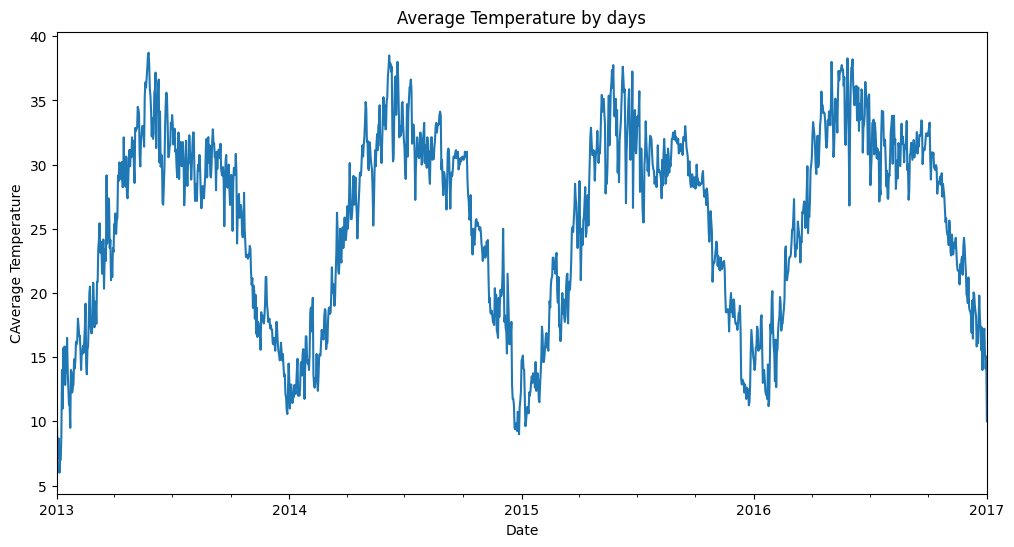

In [9]:
plt.figure(figsize=(12, 6))
df['meantemp'].plot(title='Average Temperature by days')
plt.xlabel('Date')
plt.ylabel('СAverage Temperature')
plt.show()

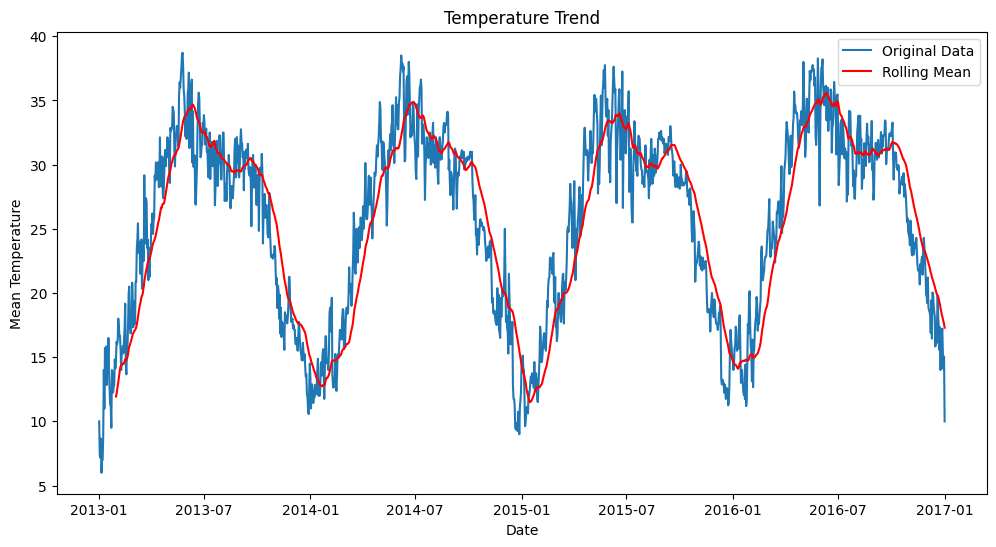

In [10]:
df['rolling_mean_temp'] = df['meantemp'].rolling(window=30).mean()  # 30-day moving average

# Visualize the moving average
plt.figure(figsize=(12, 6))
plt.plot(df['meantemp'], label='Original Data')
plt.plot(df['rolling_mean_temp'], label='Rolling Mean', color='red')
plt.title('Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

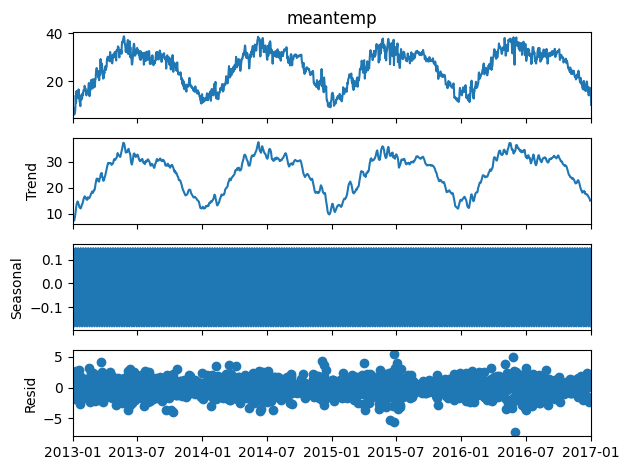

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
result = seasonal_decompose(df['meantemp'], model='additive')
result.plot()
plt.show()

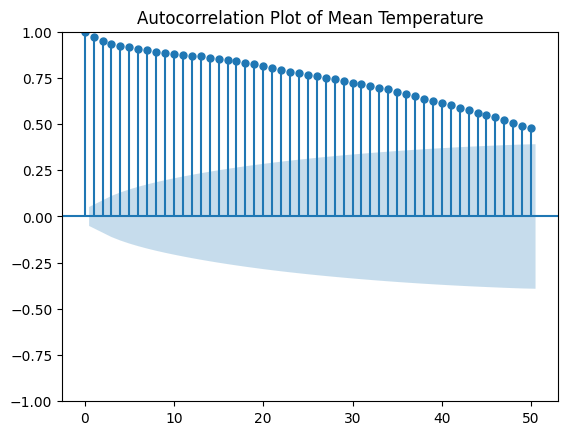

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot
plot_acf(df['meantemp'], lags=50)  # Consider 50 lags
plt.title('Autocorrelation Plot of Mean Temperature')
plt.show()

Conclusion: The line plot shows an autocorrelation plot for mean temperature, which is a crucial tool in time series analysis for understanding the relationship between a data point and its past values.

Implications for Forecasting Models:
Gradual Decay: The gradual decay of autocorrelation as the lag increases, which is evident in the plot, suggests that past values have a diminishing influence as the time gap increases. This pattern is typical in time series data that exhibits a strong trend or seasonal component.
Persistence: The high initial autocorrelation indicates persistence; meaning that temperatures from one period are highly predictive of the next period. This persistence needs to be accounted for in forecasting models like ARIMA, which include autoregressive terms to model this relationship.
Model Selection: The slow decay implies that models with more lagged terms might be necessary to capture the autocorrelation effectively. This could mean an ARIMA model with a higher order of the AR term might be appropriate.
Hypotheses about Climatic Trends:
Climatic Inertia Hypothesis: The strong initial autocorrelation suggests a climatic inertia where the temperature does not change abruptly, likely due to the large thermal mass of the Earth's surface and atmosphere.
Weather Pattern Hypothesis: The sustained significant autocorrelation over several lags might indicate persistent weather patterns, such as prolonged heatwaves or cold spells.
Anthropogenic Influence Hypothesis: If this is a long-term dataset, the slow decay in autocorrelation could suggest increasing mean temperatures over time, possibly indicative of anthropogenic climate change effects.
Validation Through Discussion:
To validate these hypotheses, discussions with climatologists and further statistical testing would be necessary. For example:

Trend Analysis: Apply statistical tests for detecting trends, such as the Mann-Kendall trend test, to confirm if there is a statistically significant upward or downward trend in temperature over time.
Seasonal Analysis: Use Fourier analysis or Wavelet transformations to identify and confirm the presence of specific seasonal cycles in the temperature data.
Climate Model Comparisons: Compare the observed patterns with predictions from established climate models to see if they align with expected outcomes based on current climate change projections.
External Data Correlation: Correlate the temperature data with external datasets like CO2 emissions, solar activity, or El Niño events to explore possible drivers of the observed temperature patterns.

# Time Series Forecasting (45 Min)

In [13]:
train = df['meantemp']
from statsmodels.tsa.arima.model import ARIMA


In [14]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.5 MB/s eta 0:00:00


In [15]:
import pandas as pd
from pmdarima import auto_arima

# Using auto_arima to find the best ARIMA parameters
auto_model = auto_arima(df['meantemp'], seasonal=False, trace=True,
                        error_action='ignore', suppress_warnings=True)

# The best model's parameters
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5546.314, Time=2.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5650.181, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5614.068, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5602.114, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5648.181, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5546.168, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5573.723, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5544.460, Time=2.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5546.100, Time=2.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5600.849, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5542.478, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5600.115, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5612.068, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5544.118, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [16]:
#You need to select the parameters p (autoregressive), d (differencing), and q (moving average) for the ARIMA model.
p = 1
d = 1
q = 1
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [17]:
test = test['meantemp']
#Use the model to make forecasts for the length of the test set.
forecast = model_fit.forecast(steps=len(test))
#Calculate the RMSE between your forecast and the actual values.
rmse = sqrt(mean_squared_error(test, forecast))


In [18]:
print(forecast)

2017-01-02    11.354415
2017-01-03    12.130205
2017-01-04    12.574566
2017-01-05    12.829089
2017-01-06    12.974876
                ...    
2017-04-21    13.170340
2017-04-22    13.170340
2017-04-23    13.170340
2017-04-24    13.170340
2017-04-25    13.170340
Freq: D, Name: predicted_mean, Length: 114, dtype: float64


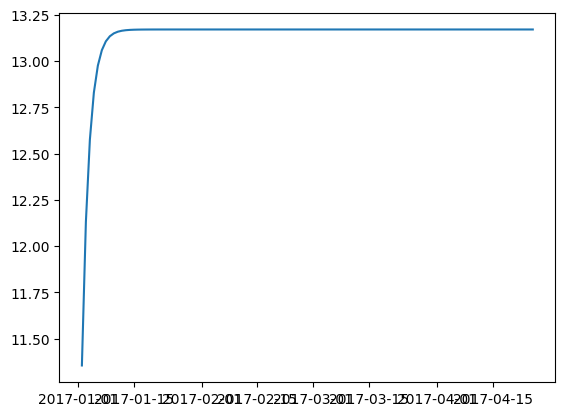

In [19]:
plt.plot(forecast)

In [20]:
print(rmse)

10.649383525981344
